<a href="https://colab.research.google.com/github/iamutkarshgoyal/Aerofit_Statistical_Analysis/blob/main/aerofit_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Importing important Liabraries**

In [ ]:
# importing all required liabraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

####**Reading Data**

In [ ]:
# importing data and assigning it to df variable
df = pd.read_csv("/content/drive/MyDrive/Data_Sets Analysis/Aerofit Data.csv")

In [ ]:
# Checking top 5 values using head command
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Checking bottom 5 values using tail command
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
# Checking Shape of Data meand row count and column counts
df.shape

(180, 9)

In [ ]:
# Column names in given data
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
# Checking how many unique value have in columns
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
# Checking if there is any null value in columns
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False])

In [ ]:
# Getting some statistical measure for all integer columns
df.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In [ ]:
# Checking data type and other information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Getting some statistical measure for all String/Object columns
df.describe(include = "object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


#### **Revenue and Product Sold**

The KP281 is an entry-level treadmill that sells for 1,500 Dollar.


The KP481 is for mid-level runners that sell for 1,750 Dollar.


The KP781 treadmill is having advanced features that sell for 2,500 Dollar.

In [ ]:
Total_Quantity_Sold = df['Product'].value_counts().to_frame().reset_index().rename(columns = {"index" : "Product", "Product" : "Product Sold"})
print(Total_Quantity_Sold)

  Product  Product Sold
0   KP281            80
1   KP481            60
2   KP781            40


In [ ]:
Total_Quantity_Sold['Revenue'] = pd.Series(np.array([80*1500, 60*1750, 40*2500]))
Total_Quantity_Sold

,Product,Product Sold,Revenue
0,KP281,80,120000
1,KP481,60,105000
2,KP781,40,100000


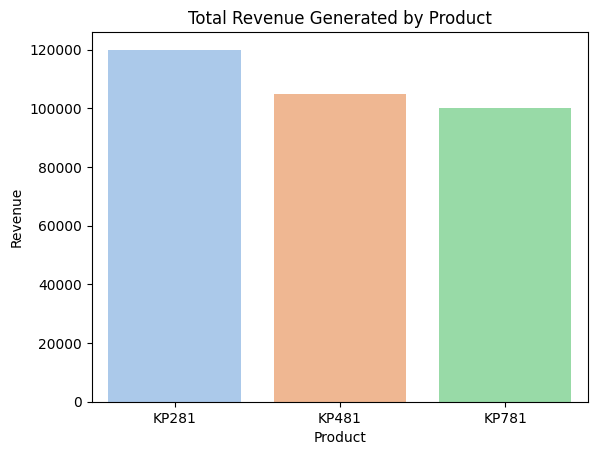

In [ ]:
sns.barplot(data = Total_Quantity_Sold, x = "Product", y = "Revenue", palette='pastel')
plt.title("Total Revenue Generated by Product")
plt.show()

Product KP281 brings in the highest revenue, KP481 and KP781 come next in line respectively.

#### **Analyzing Data, Descriptive Statistics**

In [ ]:
# Checking mean or average value for few columns
print("Average Age of People =", int(df.Age.mean().round()))
print("Average Fitness Rank of People =", int(df.Fitness.mean().round()))
print("Average Education of People =", int(df.Education.mean().round()))
print("Average income of People =", df.Income.mean().round(2))
print("Average Miles People Run =", df.Miles.mean().round(2))

Average Age of People = 29
Average Fitness Rank of People = 3
Average Education of People = 16
Average income of People = 53719.58
Average Miles People Run = 103.19


In [ ]:
# Checking median or middle value for few columns
print("Median Value in Age Column =", int(df.Age.median().round()))
print("Median Value in Fitness Column =", int(df.Fitness.median().round()))
print("Median Value in Education Column =", int(df.Education.median().round()))
print("Median Value in income Column =", df.Income.median().round(2))
print("Median Value in Miles Column =", df.Miles.median().round(2))

Median Value in Age Column = 26
Median Value in Fitness Column = 3
Median Value in Education Column = 16
Median Value in income Column = 50596.5
Median Value in Miles Column = 94.0


In [ ]:
# Checking mode or most repeated value for few columns
print(f"Most repeated value in Age column is", int(df.Age.mode().round()), "which repeated", df[df["Age"] == df.Age.mode().values[0]]["Age"].value_counts().values[0],"times.")
print(f"Most repeated value in Fitness column is", int(df.Fitness.mode().round()), "which repeated", df[df["Fitness"] == df.Fitness.mode().values[0]]["Fitness"].value_counts().values[0],"times.")
print(f"Most repeated value in Education column is", int(df.Education.mode().round()), "which repeated", df[df["Education"] == df.Education.mode().values[0]]["Education"].value_counts().values[0],"times.")
print(f"Most repeated value in Income column is", int(df.Income.mode().round()), "which repeated", df[df["Income"] == df.Income.mode().values[0]]["Income"].value_counts().values[0],"times.")
print(f"Most repeated value in Miles column is", int(df.Miles.mode().round()), "which repeated", df[df["Miles"] == df.Miles.mode().values[0]]["Miles"].value_counts().values[0],"times.")

Most repeated value in Age column is 25 which repeated 25 times.
Most repeated value in Fitness column is 3 which repeated 97 times.
Most repeated value in Education column is 16 which repeated 85 times.
Most repeated value in Income column is 45480 which repeated 14 times.
Most repeated value in Miles column is 85 which repeated 27 times.


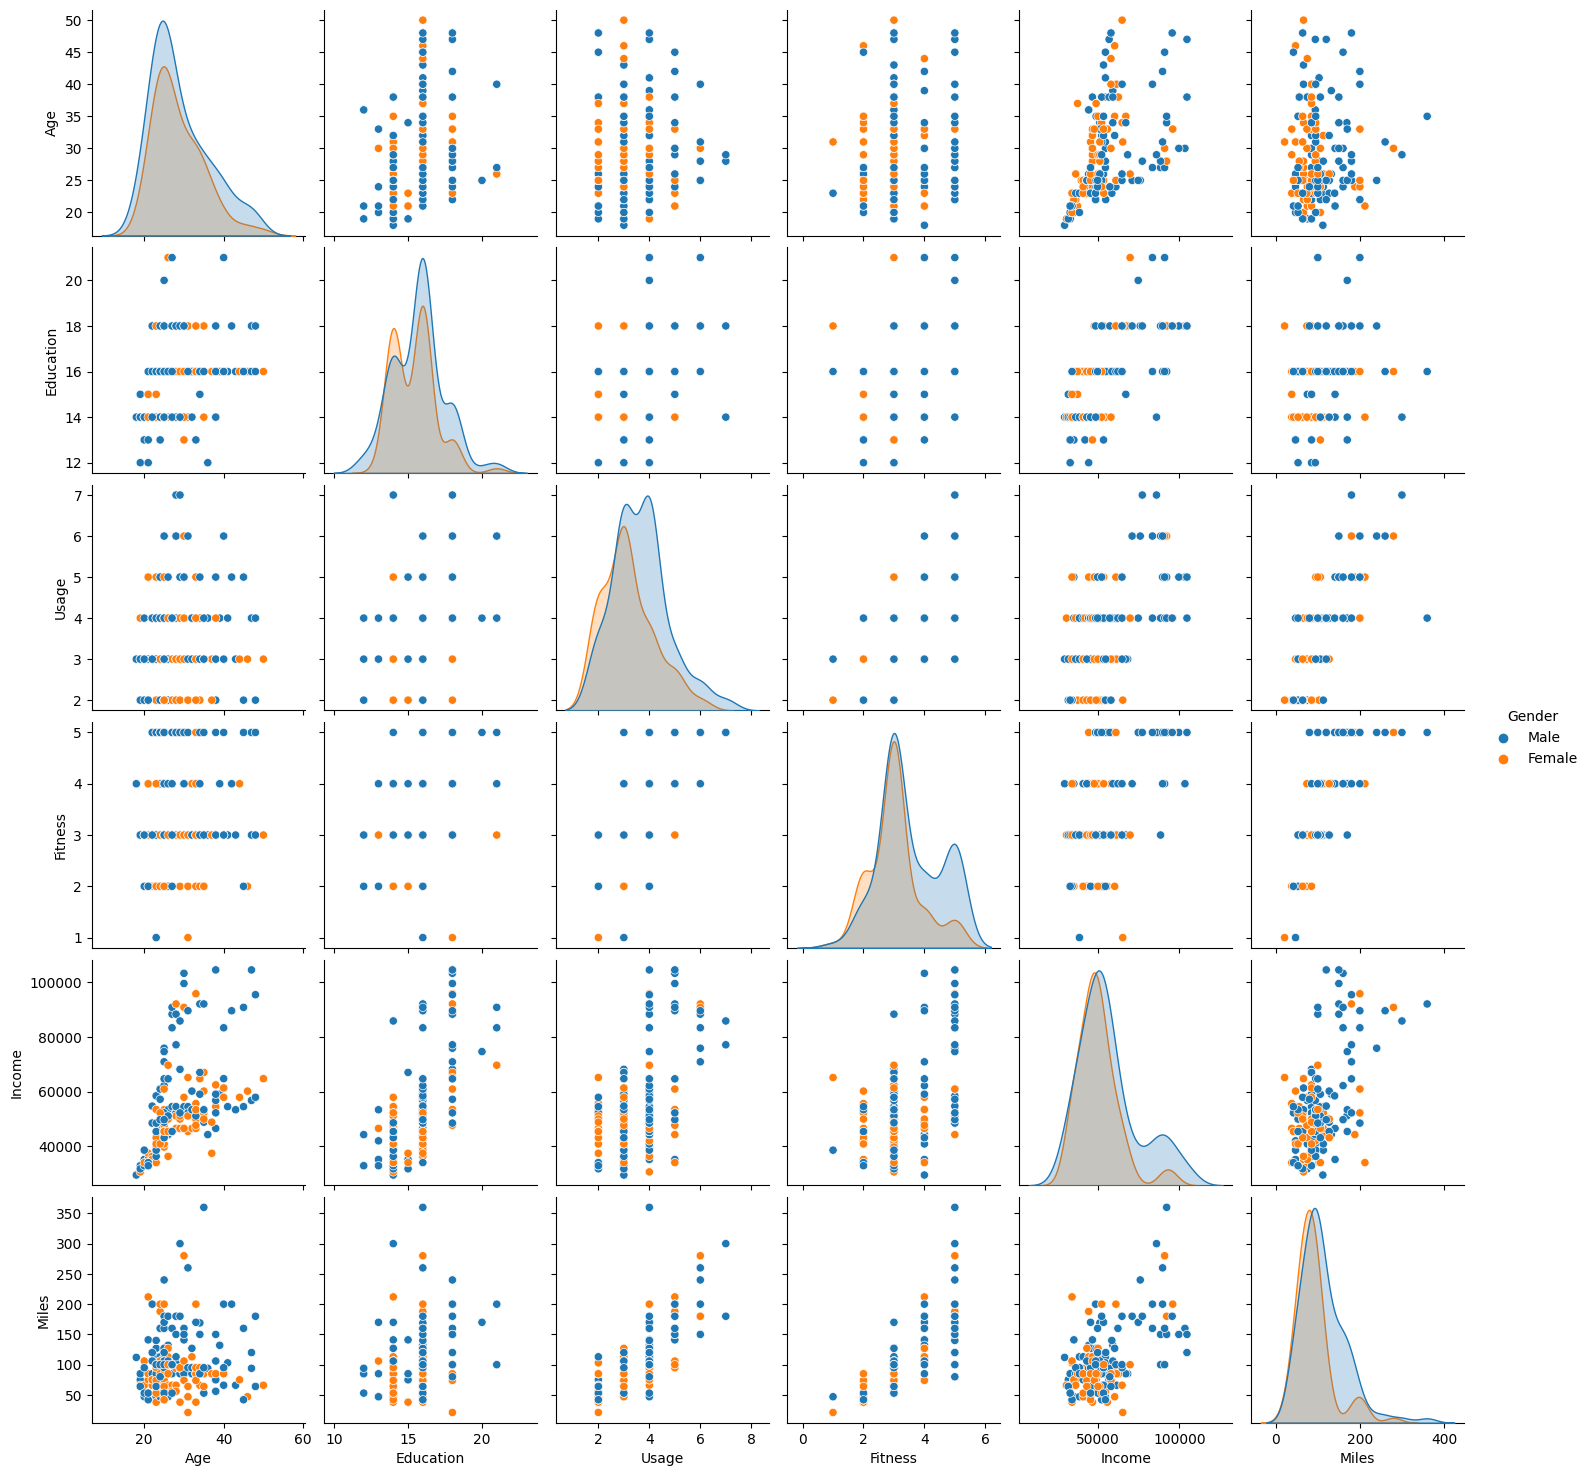

In [ ]:
sns.pairplot(df, hue = "Gender")
plt.show()

#### **Univariate Analysis and Data Visualization**

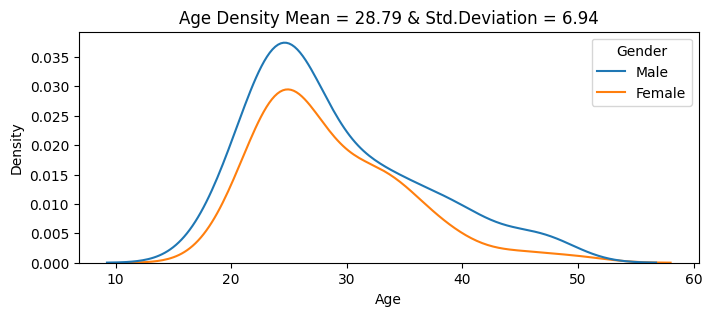

In [ ]:
# Plotting a density chart to measure for what age we have more people
plt.figure(figsize = (8,3))
sns.kdeplot(data = df, x = "Age", hue = "Gender")
plt.title(f"Age Density Mean = {df.Age.mean().round(2)} & Std.Deviation = {df.Age.std().round(2)}")
plt.show()



---


1.   As per above diagram, most of the people are between Age 24 to 27 among Male and Female both.
2.As per univariate analysis on Age column, we can see we have More male buyers in comparison of Female.
3. Mean Age of the population is 29 years with standard deviation of 6.94 which is almost 7 means data spread out in complete range of age.

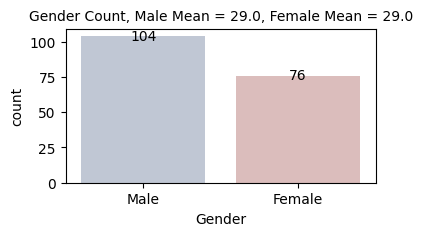

In [ ]:
# Plotting bar plot to for Gender Count
plt.figure(figsize = (4,2))
ax = sns.countplot(data = df, x = "Gender", palette = "vlag")
for i in ax.patches:
  ax.annotate(f"{int(i.get_height())}",
              xy = (i.get_x() + i.get_width()/2, i.get_height()),
              ha = "center",
              va = "center")
Male_mean = df[df.Gender.isin(["Male"])].Age.mean().round()
Female_mean = df[df.Gender.isin(["Female"])].Age.mean().round()
plt.title(f"Gender Count, Male Mean = {Male_mean}, Female Mean = {Female_mean}", fontdict = {'fontsize': (10)})
plt.show()



---


We have customer ration of (4:3) in terms of Gender distribution.

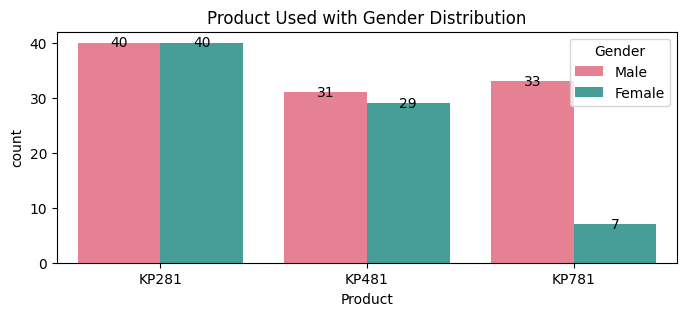

In [ ]:
# Plotting a Countplot to measure different Product Used with Gender distribution
plt.figure(figsize = (8,3))
ax = sns.countplot(data = df, x = "Product", hue = "Gender", palette = "husl")
plt.title("Product Used with Gender Distribution")
for i in ax.patches:
  ax.annotate(f"{int(i.get_height())}",
              xy = (i.get_x() + i.get_width()/2, i.get_height()),
              ha = "center",
              va = "center")
plt.show()



---


As per above chart most popular product for Aerofit is KP281 which equally used by both Male and Female.

2nd most popular product is KP481 which used by maled population in comparison to Female.

The least popular product out of 3 is KP781 which is mostly popular in Male as they used it more in comparison of Female.

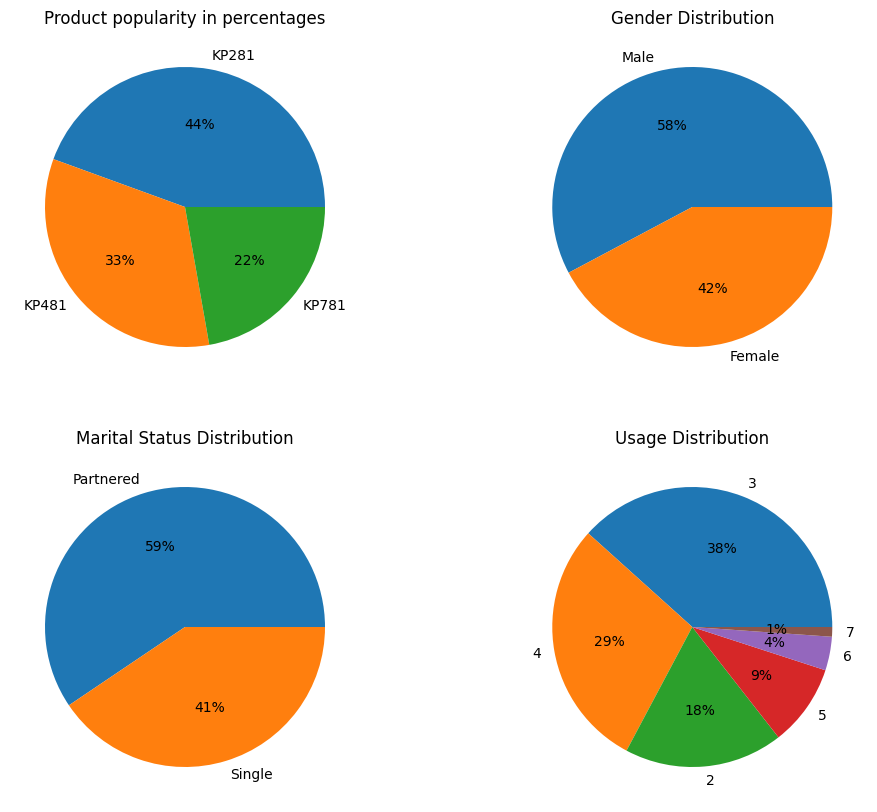

In [ ]:
# Plotting piechart for univariate distribution

Product_values = df.Product.value_counts().values
Gender_values = df.Gender.value_counts().values
MaritalStatus_values = df.MaritalStatus.value_counts().values
usage_values = df.Usage.value_counts().values

Product_keys = df.Product.value_counts().index.to_list()
Gender_keys = df.Gender.value_counts().index.to_list()
MaritalStatus_keys = df.MaritalStatus.value_counts().index.to_list()
usage_keys = df.Usage.value_counts().index.to_list()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.set_size_inches(12,10)

ax1.pie(x = Product_values, labels = Product_keys, autopct='%.0f%%')
ax2.pie(x = Gender_values, labels = Gender_keys, autopct='%.0f%%')
ax3.pie(x = MaritalStatus_values, labels = MaritalStatus_keys, autopct='%.0f%%')
ax4.pie(x = usage_values, labels = usage_keys, autopct = "%.0f%%")

ax1.set_title("Product popularity in percentages")
ax2.set_title("Gender Distribution")
ax3.set_title("Marital Status Distribution")
ax4.set_title("Usage Distribution")

plt.show()



---


**Product popularity in percentages** : KP281 was the most used product, used 44% by Aerofit users. followed by KP481 product which used by 33%. Both are the Beginner level tradmills. KP781 which advance treadmill and used by only 22% users of business.

**Gender Distribution** : There are 58% Male users and 42% Female users.

**Marital Status Distribution** : There are 59% users have partner and 41% people are single.

**Usage Distribution** :

1.   There are only 1% of user who use treadmill for all 7 days in a week and 4% users who used for 6 days in a week, only 9% user use treadmill for 5 days.
2.   29% of user use treadmill for 4 days, 38% user use it for 3 days and 18% user use treamill for 2 days only in a week.







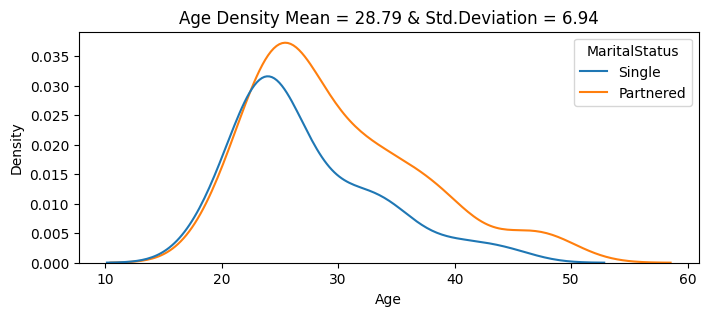

In [ ]:
# Plotting a density chart for Age with Martial Status
plt.figure(figsize = (8,3))
sns.kdeplot(data = df, x = "Age", hue = "MaritalStatus")
plt.title(f"Age Density Mean = {df.Age.mean().round(2)} & Std.Deviation = {df.Age.std().round(2)}")
plt.show()



---


We can clearly see there are more population who have partnered over single person.

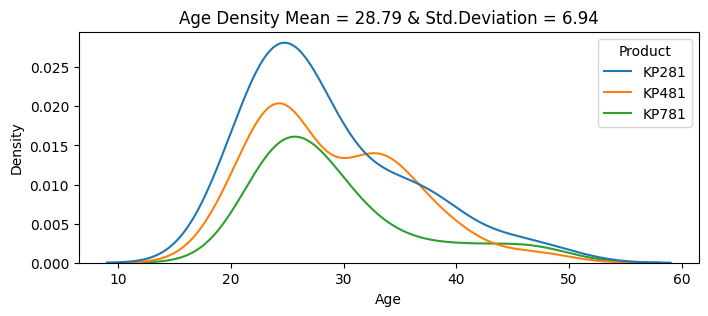

In [ ]:
# Plotting a density chart for Age with Product
plt.figure(figsize = (8,3))
sns.kdeplot(data = df, x = "Age", hue = "Product")
plt.title(f"Age Density Mean = {df.Age.mean().round(2)} & Std.Deviation = {df.Age.std().round(2)}")
plt.show()

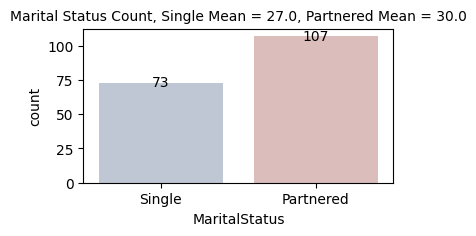

In [ ]:
# Plotting bar plot to for Marital Status count
plt.figure(figsize = (4,2))
ax = sns.countplot(data = df, x = "MaritalStatus", palette = "vlag")
for i in ax.patches:
  ax.annotate(f"{int(i.get_height())}",
              xy = (i.get_x() + i.get_width()/2, i.get_height()),
              ha = "center",
              va = "center")
Single_mean = df[df.MaritalStatus.isin(["Single"])].Age.mean().round()
Partnered_mean = df[df.MaritalStatus.isin(["Partnered"])].Age.mean().round()
plt.title(f"Marital Status Count, Single Mean = {Single_mean}, Partnered Mean = {Partnered_mean}", fontdict = {'fontsize': (10)})
plt.show()

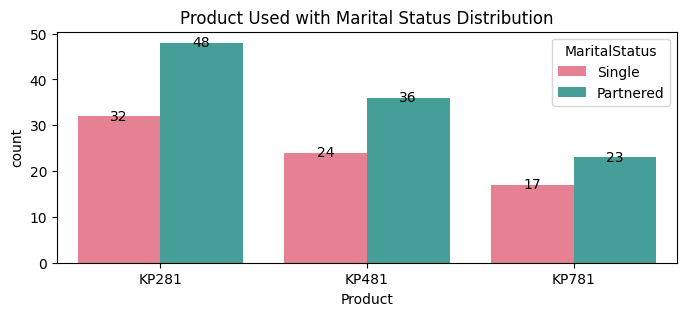

In [ ]:
# Plotting a Countplot to measure different Product Used with Marital Status distribution
plt.figure(figsize = (8,3))
ax = sns.countplot(data = df, x = "Product", hue = "MaritalStatus", palette = "husl")
plt.title("Product Used with Marital Status Distribution")
for i in ax.patches:
  ax.annotate(f"{int(i.get_height())}",
              xy = (i.get_x() + i.get_width()/2, i.get_height()),
              ha = "center",
              va = "center")
plt.show()



---


There is clear spike in all products for partnered people.

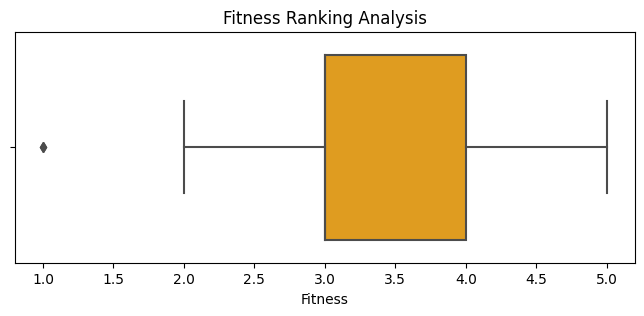

In [ ]:
# Boxplot for Fitness univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.boxplot(data = df, x = "Fitness", color = "Orange")
plt.title("Fitness Ranking Analysis")
plt.show()

In [ ]:
# Outliers in terms of Fitness
df[df.Fitness.isin([1])]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,KP281,23,Male,16,Partnered,3,1,38658,47
117,KP481,31,Female,18,Single,2,1,65220,21




---


As per the Boxplot on Fitness univariate analysis, above lines are outliers for Fitness variable, as there are only 2 values which is less then its Standard Deviation.

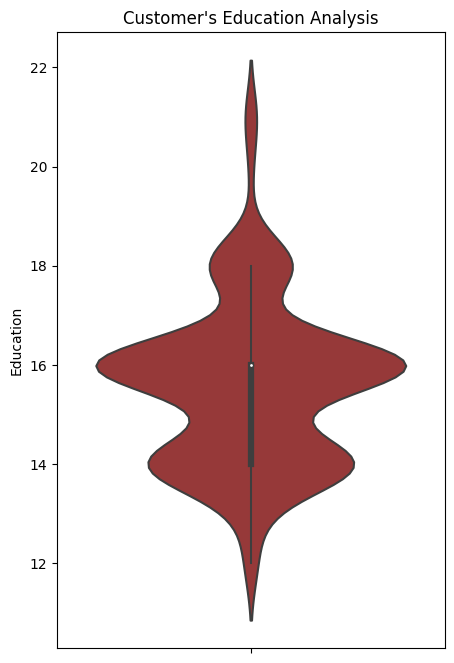

In [ ]:
# Violin plot for Education univariate variable
plt.figure(figsize = (5,8))
sns.violinplot(data = df, y = "Education", color = "Brown")
plt.title("Customer's Education Analysis")
plt.show()



---


Mean = 16, Mode = 16 and Median = 16 of Education variable is the Equall and there are outliers as well which are equal and greater then 20.

In [ ]:
# Outliers in Education Variable
df[df.Education.isin([20,21,22,23])]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
156,KP781,25,Male,20,Partnered,4,5,74701,170
157,KP781,26,Female,21,Single,4,3,69721,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
175,KP781,40,Male,21,Single,6,5,83416,200




---


Above lines are outliers for Education column as majority of customers are near
to 16.

Interestingly all these 4 customer's used KP781 product.

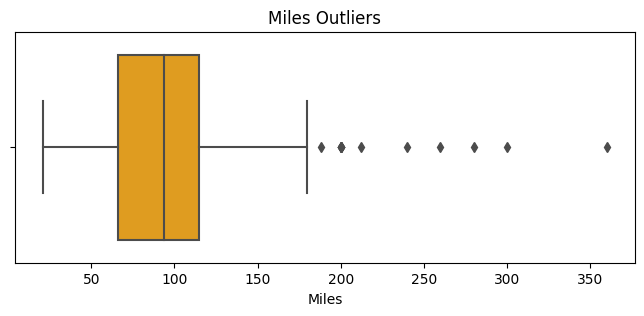

In [ ]:
# boxlot for Miles univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.boxplot(data = df, x = "Miles", hue = "Product", color = "Orange")
plt.title("Miles Outliers")
plt.show()

In [ ]:
# Miles Outliers
df[df["Miles"]>190]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
84,KP481,21,Female,14,Partnered,5,4,34110,212
142,KP781,22,Male,18,Single,4,5,48556,200
148,KP781,24,Female,16,Single,5,5,52291,200
152,KP781,25,Female,18,Partnered,5,5,61006,200
155,KP781,25,Male,18,Partnered,6,5,75946,240
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
173,KP781,35,Male,16,Partnered,4,5,92131,360




---


We can not say Outliers to these values as these are only related to product KP781 which is advanced treadmills and used by professional and as per database most of the people having highest Fitness rank 5.

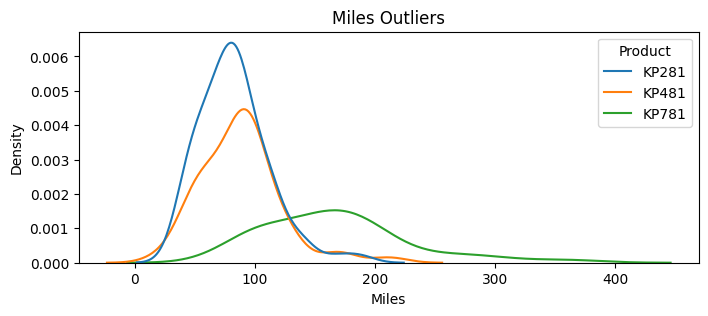

In [ ]:
# kdeplot for Miles univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.kdeplot(data = df, x = "Miles", hue = "Product", color = "Orange")
plt.title("Miles Outliers")
plt.show()

As per diagram, KP281 & KP481 having similar mean and KP781 acting as Outlier in above distribution.

In [ ]:
print("Mean for Product KP281 in terms of Miles =", df[df["Product"] == "KP281"].Miles.mean().round(2))
print("Mean for Product KP481 in terms of Miles =", df[df["Product"] == "KP481"].Miles.mean().round(2))
print("Mean for Product KP781 in terms of Miles =", df[df["Product"] == "KP781"].Miles.mean().round(2))

Mean for Product KP281 in terms of Miles = 82.79
Mean for Product KP481 in terms of Miles = 87.93
Mean for Product KP781 in terms of Miles = 166.9




---


There is clearlly difference in mean for starting treadmills [KP281 & KP481] and advanced treadmill [KP781].

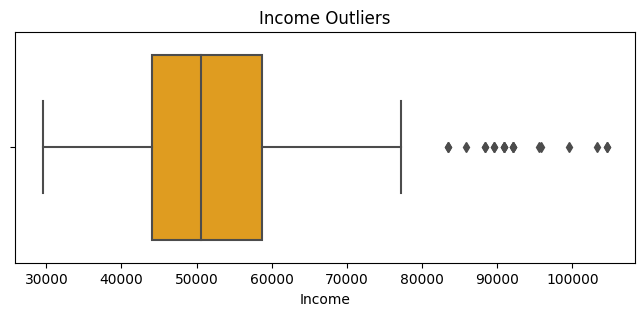

In [ ]:
# boxlot for Income univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.boxplot(data = df, x = "Income", hue = "Product", color = "Orange")
plt.title("Income Outliers")
plt.show()

In [ ]:
# Income Outliers
df[df["Income"] > 80000]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
159,KP781,27,Male,16,Partnered,4,5,83416,160
160,KP781,27,Male,18,Single,4,3,88396,100
161,KP781,27,Male,21,Partnered,4,4,90886,100
162,KP781,28,Female,18,Partnered,6,5,92131,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
168,KP781,30,Male,18,Partnered,5,4,103336,160
169,KP781,30,Male,18,Partnered,5,5,99601,150
170,KP781,31,Male,16,Partnered,6,5,89641,260




---


As per above outcome outliers belongs to those people who used KP781 product which is advanced treadmill, as per Fitness variable people have the best Fitness ranking.

Indicating to maintain the best Fitness ranking which is 5 where mean value for Fitness variable is 3 only, people need to run more hence the reason is these are outliers among the complete data.  

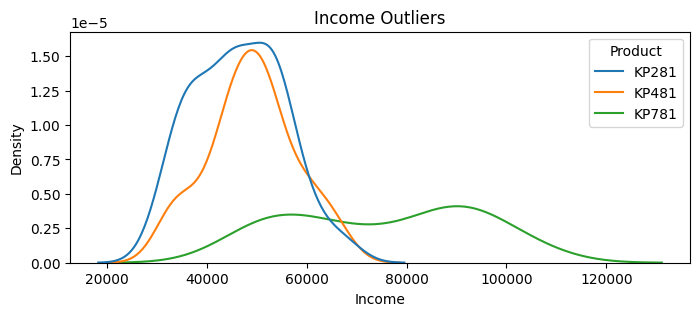

In [ ]:
# kdeplot for Miles univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.kdeplot(data = df, x = "Income", hue = "Product", color = "Orange")
plt.title("Income Outliers")
plt.show()



---


As per diagram, KP281 & KP481 having similar mean and KP781 acting as Outlier in above distribution.

In [ ]:
print("Mean for Product KP281 in terms of Income =", df[df["Product"] == "KP281"].Income.mean().round(2))
print("Mean for Product KP481 in terms of Income =", df[df["Product"] == "KP481"].Income.mean().round(2))
print("Mean for Product KP781 in terms of Income =", df[df["Product"] == "KP781"].Income.mean().round(2))

Mean for Product KP281 in terms of Income = 46418.02
Mean for Product KP481 in terms of Income = 48973.65
Mean for Product KP781 in terms of Income = 75441.58




---


There is clearlly difference in mean for starting treadmills [KP281 & KP481] and advanced treadmill [KP781].

It indicates it could be more costly then other 2 treadmills.

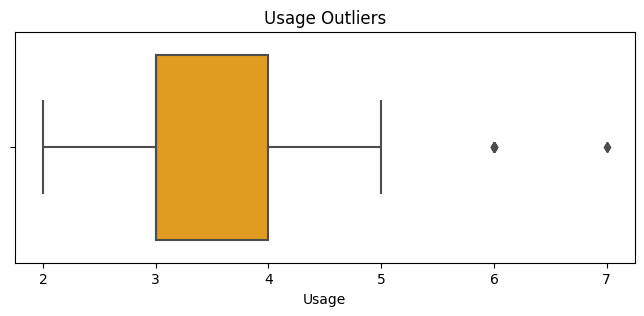

In [ ]:
# boxlot for Usage univariate variable and identifying the outliers
plt.figure(figsize = (8,3))
sns.boxplot(data = df, x = "Usage", hue = "Product", color = "Orange")
plt.title("Usage Outliers")
plt.show()

In [ ]:
# Income Outliers
df[df["Usage"] > 5]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
154,KP781,25,Male,18,Partnered,6,4,70966,180
155,KP781,25,Male,18,Partnered,6,5,75946,240
162,KP781,28,Female,18,Partnered,6,5,92131,180
163,KP781,28,Male,18,Partnered,7,5,77191,180
164,KP781,28,Male,18,Single,6,5,88396,150
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200




---


Usage Variable defying how many times in week user used the equipment, where the mean of Usage variable is 3.5.

As per above data fitness rank for the user is 5 and they used advanced treadmill KP781.

To maintain goo fitness rank, user need to run more oftenly, hence this came out as outliers.

####**Multi-Variate Analysis and Data Visualization**

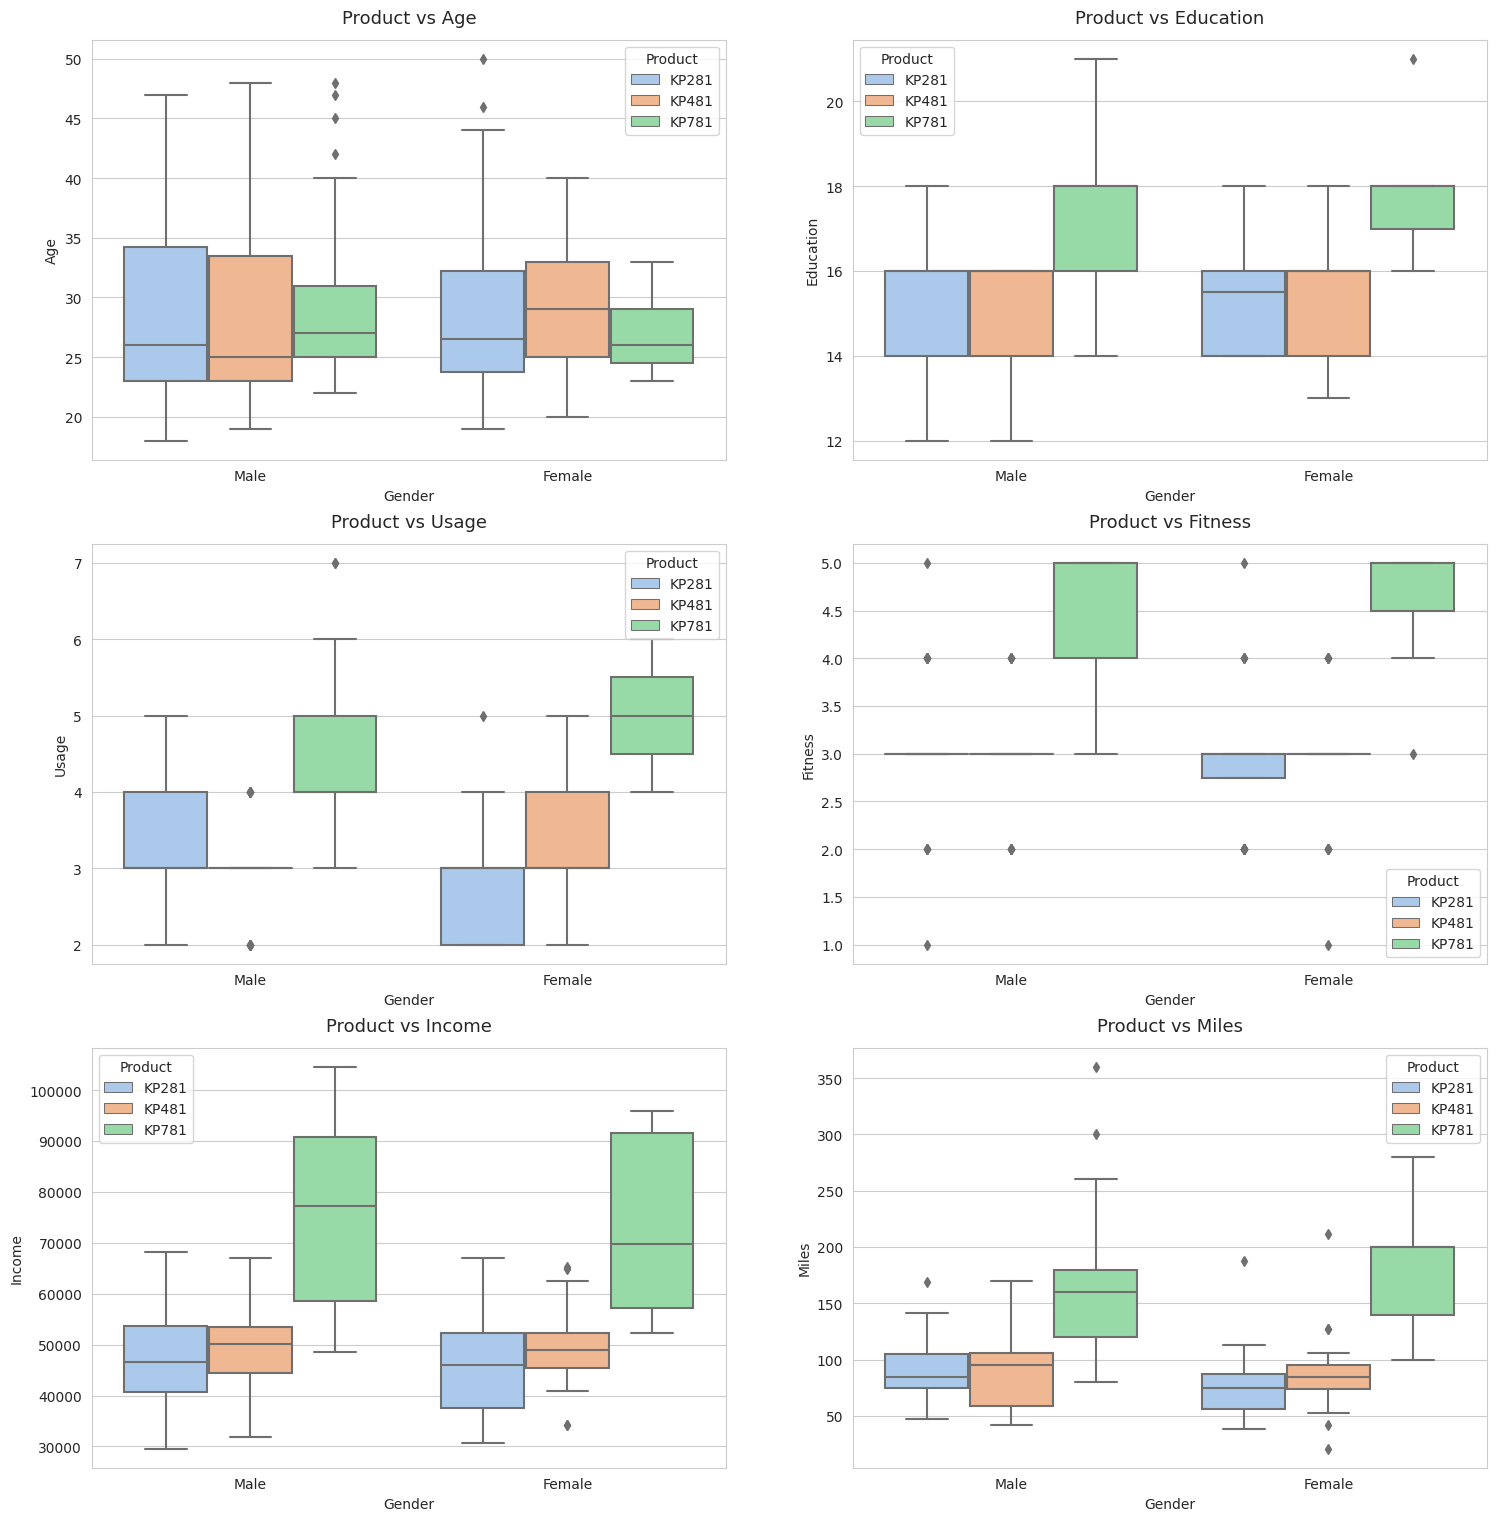

In [ ]:
var= ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("whitegrid")
fig,axs=plt.subplots(3,2,figsize = (18,12))
fig.subplots_adjust(top = 1.3)
count = 0
for i in range(3):
  for j in range(2):
    sns.boxplot(data = df, x = 'Gender', y = var[count], hue = 'Product', ax = axs[i,j], palette = "pastel")
    axs[i,j].set_title(f"Product vs {var[count]}", pad = 12, fontsize = 13)
    count += 1

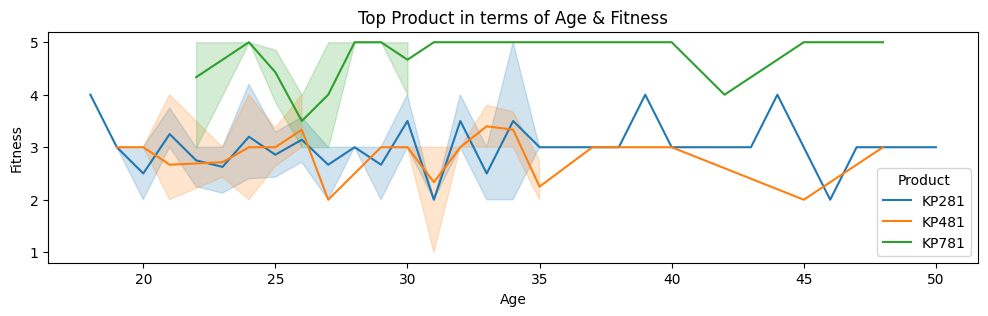

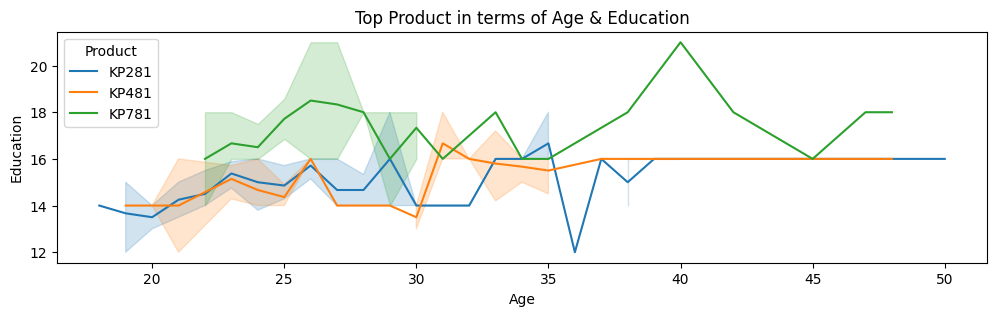

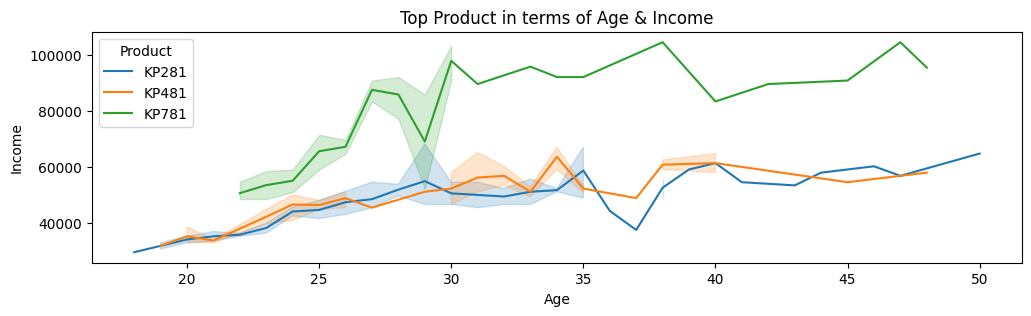

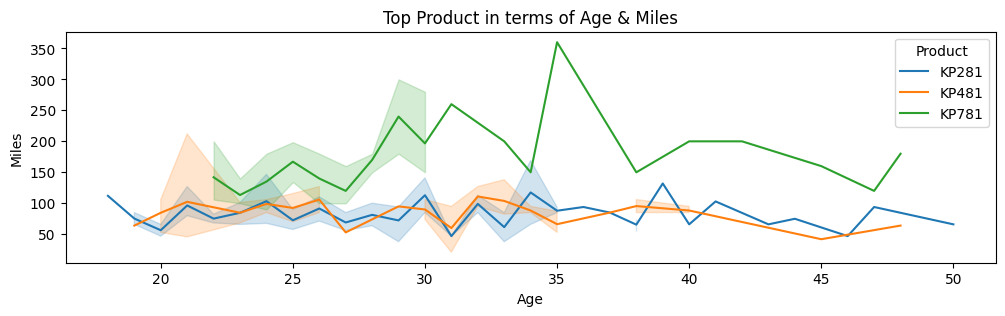

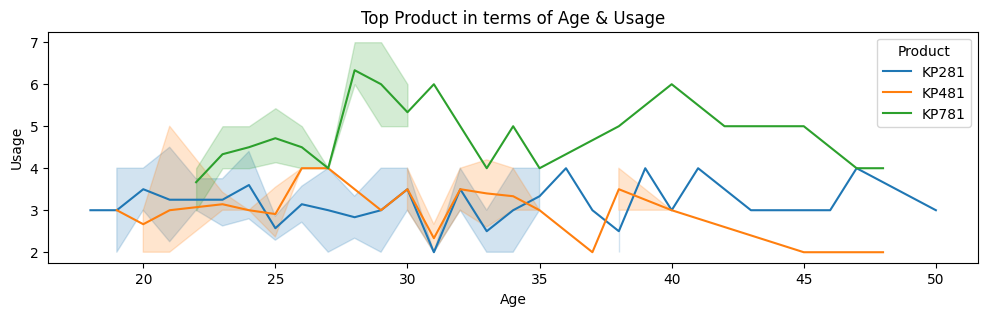

In [ ]:
# Line Subplots for Product Analysis with different Variables

# Top Product in terms of Age & Fitness
plt.figure(figsize = (12,3))
sns.lineplot(data = df, x = "Age", y = "Fitness", hue = "Product", legend = "full")
plt.title("Top Product in terms of Age & Fitness")
plt.show()

#Top Product in terms of Age & Education
plt.figure(figsize = (12,3))
sns.lineplot(data = df, x = "Age", y = "Education", hue = "Product", legend = "full")
plt.title("Top Product in terms of Age & Education")
plt.show()

#Top Product in terms of Age & Income
plt.figure(figsize = (12,3))
sns.lineplot(data = df, x = "Age", y = "Income", hue = "Product", legend = "full")
plt.title("Top Product in terms of Age & Income")
plt.show()

#Top Product in terms of Age & Miles
plt.figure(figsize = (12,3))
sns.lineplot(data = df, x = "Age", y = "Miles", hue = "Product", legend = "full")
plt.title("Top Product in terms of Age & Miles")
plt.show()

#Top Product in terms of Age & Usage
plt.figure(figsize = (12,3))
sns.lineplot(data = df, x = "Age", y = "Usage", hue = "Product", legend = "full")
plt.title("Top Product in terms of Age & Usage")
plt.show()

Product KP781 is used more compared to others products KP281 and KP481
this product is also prefered by highly-educated customers; this means highly-educated customers tend to exercise more.

Product KP781 is prefered by high-income earning individuals since highly-educated customer prefer product KP781 because they exercise more; their fitness levels are generally on high scale, the number of target miles they set are also higher

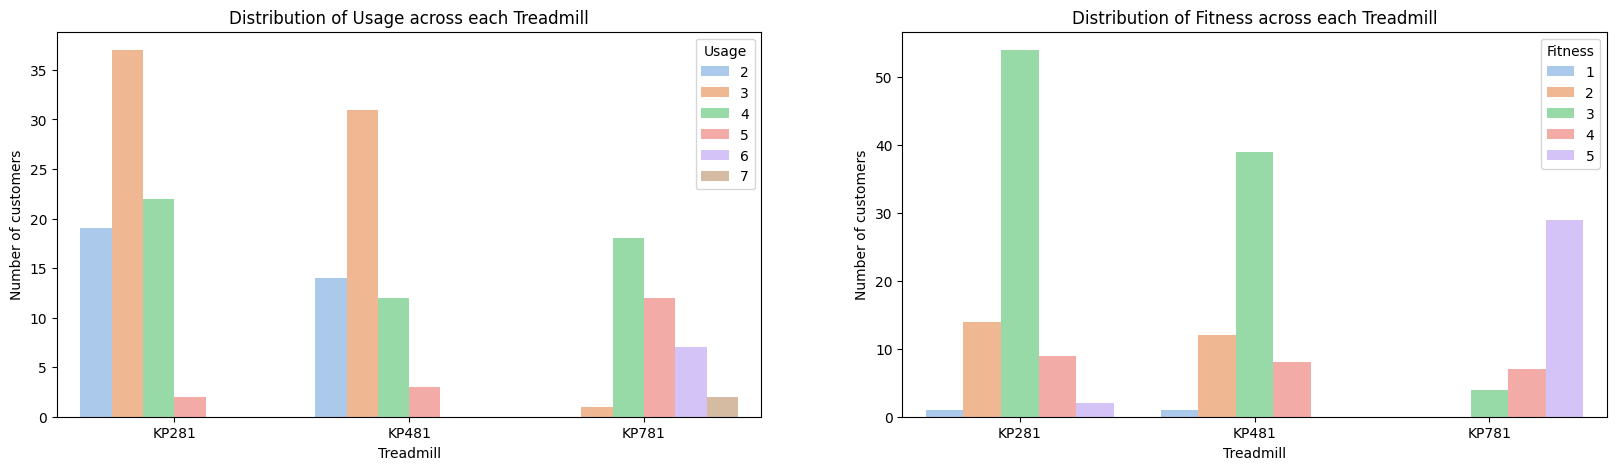

In [ ]:
plt.figure(figsize=(20,5))
# Usage column
plt.subplot(1,2,1)
sns.countplot(data=df,x='Product',hue='Usage',palette='pastel')
plt.xlabel('Treadmill')
plt.ylabel('Number of customers')
plt.title('Distribution of Usage across each Treadmill')

# Fitness column
plt.subplot(1,2,2)
sns.countplot(data=df,x='Product',hue='Fitness',palette='pastel')
plt.xlabel('Treadmill')
plt.ylabel('Number of customers')
plt.title('Distribution of Fitness across each Treadmill')

plt.show()

Customers who use treadmills 3 times a week prefer both KP281 and KP481. However, customers who use treadmills 4-5 times a week favor the KP781 treadmill.


Customers with fitness level 3 prefer both KP281 and KP481 treadmills, while customers with fitness level 5 predominantly use the most advanced KP781 treadmill.

<ipython-input-73-34cb935a882e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt='.2f')


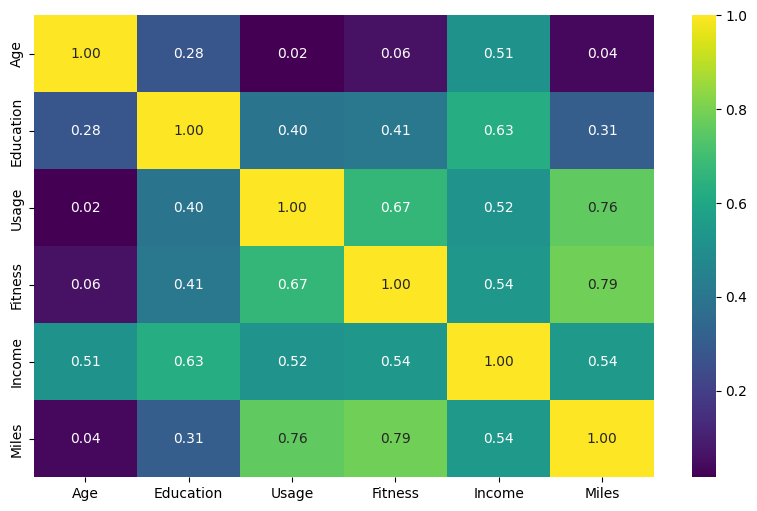

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt='.2f')
plt.show()

**Age and Education:** There is a positive correlation of approximately 0.28 between Age and Education. This indicates that as the customers' age increases, their education level tends to be higher.


**Age and Income:** There is a moderate positive correlation of approximately 0.51 between Age and Income. This suggests that as the customers' age increases, their income tends to be higher.


**Education and Income:** There is a relatively strong positive correlation of approximately 0.63 between Education and Income. This suggests that customers with higher levels of education tend to have higher incomes.


**Usage and Fitness:** There is a strong positive correlation of approximately 0.67 between Usage and Fitness. This indicates that customers who plan to use the treadmill more frequently tend to have higher fitness levels.


**Fitness and Miles:** There is a strong positive correlation of approximately 0.79 between Fitness and Miles. This indicates that customers with higher fitness levels also expect to walk/run more miles per week.


**Age and Fitness:** There is a weak positive correlation of approximately 0.06 between Age and Fitness. Similar correlation can be observed with Age and Usage as well as Age and Miles.

###**Business Statistics & Probability**

In [ ]:
# Impact of gender on purchasing the treadmill
pd.crosstab(index=df['Product'],columns=df['Gender'],margins=True,margins_name='Total',normalize=True).round(2)

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


In [ ]:
# Impact of marital status on purchasing the Treadmill
pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],margins=True,margins_name='Total',normalize=True).round(2)

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


In [ ]:
Age_Group = []
for i in df["Age"]:
  if i > 0 and i <= 20:
    Age_Group.append("Teenage")
  elif i > 20 and i <= 40:
    Age_Group.append("Young")
  else:
    Age_Group.append("Old")

df["Age_Group"] = Age_Group
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group
0,KP281,18,Male,14,Single,3,4,29562,112,Teenage
1,KP281,19,Male,15,Single,2,3,31836,75,Teenage
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teenage


In [ ]:
Income_Group = []
for i in df["Income"]:
  if i > 0 and i <= 30000:
    Income_Group.append("Low_Income")
  elif i > 30000 and i <= 60000:
    Income_Group.append("Medium_Income")
  else:
    Income_Group.append("High_Income")

df["Income_Group"] = Income_Group
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Group,Income_Group
0,KP281,18,Male,14,Single,3,4,29562,112,Teenage,Low_Income
1,KP281,19,Male,15,Single,2,3,31836,75,Teenage,Medium_Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teenage,Medium_Income


In [ ]:
#Impact of Age groups on purchasing the treadmill
pd.crosstab(index=df['Product'],columns=df['Age_Group'],margins=True,margins_name='Total',normalize=True).round(2)

Age_Group,Old,Teenage,Young,Total
Product,,,,
KP281,0.03,0.03,0.38,0.44
KP481,0.01,0.02,0.30,0.33
KP781,0.02,0.00,0.20,0.22
Total,0.07,0.06,0.88,1.00


In [ ]:
# Impact of Income groups on purchasing the treadmill
pd.crosstab(index=df['Product'],columns=df['Income_Group'],margins=True,margins_name='Total',normalize=True).round(2)

Income_Group,High_Income,Low_Income,Medium_Income,Total
Product,,,,
KP281,0.03,0.01,0.41,0.44
KP481,0.04,0.00,0.29,0.33
KP781,0.16,0.00,0.06,0.22
Total,0.23,0.01,0.76,1.00


###**Business Analysis**

Product KP281 brings in the highest revenue, KP481 and KP781 come next in line respectively
Majority of the customers are in the age group of 22-33 years
~60-40% distribution of the male and female product buyers
Majority of the buyers spend 14, 16, 18 years on their education
~60-40% distribution of the single and partnered product buyers
Most of the users use the treadmill 3-4 times a week
Most of the users rate themselves average in terms of their fitness levels
Majority of the users earn between $35000 and $60000 annually
Majority of the users set target miles expected to be walked/ran between 53 and 132 miles
Insights from product-based study:
Relationship with Age: no major insights
Relationship with Gender:
Very few female customers buy KP781 product(priced at 2500 dollats); could be cost-related reasons
Relationship with Education:
Highly educated customers prefer product KP781; they could be more aware of the product's typical features and its usage
Relationship with MaritalStatus: no major insights
Relationship with Usage:
product KP781 is used more compared to others products KP281 and KP481
this product is also prefered by highly-educated customers; this means highly-educated customers tend to exercise more Relationship with Fitness:
since highly-educated customer prefer product KP781 because they exercise more; their fitness levels are generally on high scale
Relationship with Income and Miles:
product KP781 is prefered by high-income earning individuals
since highly-educated customer prefer product KP781 because they exercise more; their fitness levels are generally on high scale, the number of target miles they set are also higher.

Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill.
KP281, being an entry-level and more affordable treadmill compared to the others, is the preferred choice among the majority of customers.
33.3% of customers favor the KP481 treadmill, drawn by its ideal fit for mid-level runners and its excellent value-for-money offering.
KP781 treadmill, being more advanced and costlier than the other two options, is chosen by only 22.2% of customers.
Aerofit has 57.78% male customers and 42.22% female customers.
Among male customers, 38.5% prefer KP281 as an entry-level and cost-effective option. Meanwhile, 29.8% opt for KP481 due to its value for money proposition, and 31.7% favor KP781 for its advanced features.
Among female customers, 52.6% prefer KP281 as an entry-level and cost-effective option. Additionally, 38.2% opt for KP481 due to its value for money proposition, while only 9.2% favor KP781 due to its higher cost compared to the other two options.Probablity of female customers buying KP781 is 4% which is very low.
Both female and male customers equally prefers KP281 with probablity 22.2%.
Probablity of male customers buying KP481 is 17%
Probablity of female customers buying KP481 is 16% which is also good.
59.4% of Aerofit customers are married, while remaining 40.56% are single.
Married customers have a higher frequency of purchasing all treadmills compared to single customers.
The trend observed among both married and single customers reflects that KP281, being an entry-level treadmill, is the most frequently purchased option, while KP781, due to its higher cost, remains the least popular choice for both customer groups.
The purchase frequency for both married and single customers follows the trend of KP281 > KP481 > KP781, with KP281 being the most frequently purchased treadmill and KP781 being the least frequently purchased one.
The probability of single customers purchasing each of the treadmills is lower compared to that of married customers.
Most of the Aerofit customer falls under young age-group (18-29).
27.78 % of middle-aged(30-39) users prefer to use the Aerofit Treadmills.
9.4% of users in the old (40-50) age group prefer purchasing Aerofit treadmills.
Among young customers, the purchase distribution for Aerofit treadmills is as follows: 46.9%prefer KP281, 29.2% prefer KP481, and the remaining 23.9% prefer KP781.
Among middle-aged customers, suprisingly 44% prefer KP481 over the other two treadmills, while 40.0% prefer KP281, and only 16% prefer the KP781.
Among old customers, 41.2% prefer KP281, while 29.4% prefer both KP481 and KP781.
The probability of young customers buying the KP281 treadmill is 29%, while the probability of buying the KP481 treadmill is 18%, and the probability of buying the KP781 treadmill is 15%.
The probability of middle-aged customers buying the KP281 treadmill is 11%, while the probability of buying the KP481 treadmill is 12%, and the probability of buying the KP781 treadmill is 4%.
The probability of old customers buying the KP281 treadmill is 4%, while the probability of buying the KP481 treadmill is 3%, and the probability of buying the KP781 treadmill is 3%.
The probability of old customers purchasing each of the treadmills is lower compared to that of other age-group customers.
Approximately 88% of Aerofit customers belong to the low-income (29000-50000 USD) and medium-income (51000-75000 USD) groups.Remaining 11.67% belongs to High income group (above 75000 usd).
Due to its price of 2500 USD, the probability of customers belonging to the low-income and middle-income groups buying the KP781 treadmill is low compared to customers in the high-income group who can afford this higher-priced treadmill.
Customers belonging to the high-income group exclusively prefer KP781 due to its advanced features and higher cost compared to the other two treadmills.
Customers with 14-16 years of education prefer the KP281 and KP481 treadmills. However, among all treadmills, the majority of customers with 16-18 years of education prefer the KP781 treadmill.
Customers who run 60-100 miles per week prefer the KP281 treadmill, while mid runners who run 60-120 miles per week opt for the KP481. On the other hand, hardcore runners who run 120-200 miles per week prefer the KP781 treadmill due to its advanced features.
Customers who use treadmills 3 times a week prefer both KP281 and KP481. However, customers who use treadmills 4-5 times a week favor the KP781 treadmill.
Customers with fitness level 3 prefer both KP281 and KP481 treadmills, while customers with fitness level 5 predominantly use the most advanced KP781 treadmill.

###**Recommendation**

A better, high-end, premium product for highly-educated, high income and active customers to increase revenue.
Campaigns to promote KP781 product for females specially
Since KP281 and KP481 also brings in significant revenue and is prefered by young & learnings individuals, added features and specialized discounts could help boost sales

Actionable Insight: Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill.

Emphasize the budget-friendly nature of the KP281 treadmill to attract more customers.
Highlight the key features of the KP281 that make it a great entry-level option for fitness enthusiasts.
Provide special offers or discounts to further entice customers looking for a cost-effective option.
Engage with fitness communities online to showcase the KP281's appeal to beginners.
Focus marketing efforts on reaching out to mid-level runners, emphasizing how the KP481 is tailored to meet their specific fitness needs and goals.
Showcase the competitive pricing and the outstanding features of the KP481 that make it a cost-effective choice for customers.
Launch targeted marketing campaigns to increase awareness and interest in the KP781 among potential customers who may value its advanced capabilities. Utilize various channels such as social media, fitness forums, and influencer collaborations.
Emphasize the unique features and benefits of the KP781 to justify its higher price. Highlight its advanced functionalities and how they enhance the workout experience, making it worththe investment.
Actionable Insight: The probability of female customers buying each of the treadmills compared to male customers is 42%:

Create targeted advertisements and promotions that appeal to women, showcasing how fitness can positively impact their lives.
Showcase the female-friendly features and benefits of Aerofit treadmills to attract more female customers.
Offer a diverse selection of treadmill models that cater to various fitness levels and preferences.
Actionable Insight: The probability of female customers buying the KP781 treadmill is 4%, which is significantly lower compared to that of male customers :

Offer special incentives and discounts exclusively for female customers interested in purchasing the KP781 treadmill. This could include limited-time promotions, personalized offers, or packagedeals to make the treadmill more appealing and accessible to this customer segment. By providing targeted incentives, it can encourage more female customers to consider and invest in the KP781.

Actionable Insight:The probability of single customers purchasing each of the treadmills is lower compared to that of married customers:

Appoint Virat Kohli as the brand ambassador for Aerofit, promoting the brand's values of fitness, health, and well-being. Virat's association with Aerofit will resonate with single customers, inspiring them to prioritize their fitness goals and consider Aerofit treadmills as a valuable addition to their fitness routines.
Introduce exclusive offers and discounts for single customers as part of the collaboration with Virat Kohli. This can include special bundles, personalized packages, or limited-time promotions, providing added incentives for single customers to choose Aerofit treadmills.
Organize virtual fitness challenges or competitions, endorsed by Virat Kohli, to engage single customers and encourage them to participate in fitness activities with Aerofit treadmills. Prizes and recognition for participants can further boost motivation and engagement.Actionable Insight:The probability of old customers purchasing each of the treadmills is lower compared to that of other age-group customers:

Offer personalized assistance to help customers aged 40-50 select the ideal treadmill model, providing them with the tools to maintain an active and healthy lifestyle. With Aerofit's expert guidance, customers can feel confident and motivated to make the most of their treadmills effectively.

Actionable Insight:Due to its price of 2500 USD, the probability of customers belonging to the low-income and middle-income groups buying the KP781 treadmill is low compared to customers in the high-income group.

Introduce tailored discounts and incentives exclusively for customers belonging to the low and middle-income groups. These offers can include limited-time promotions, cashback rewards, or bundle deals, making the KP781 treadmill more affordable and enticing for this target audience.
Provide convenient EMI (Equated Monthly Installment) payment options for the KP781 treadmill. This will allow low and middle-income customers to spread the cost over several months, easing their financial burden and making the purchase more manageable.